<a href="https://colab.research.google.com/github/gkv856/KaggleData/blob/main/GKV_NEW_Fine_Tune_BERT_for_Text_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [1]:
!nvidia-smi

Sat Sep 18 06:19:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.6.0


In [3]:
# !pip install -q tensorflow==2.3.0

In [4]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 506), reused 1388 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.02 MiB | 25.29 MiB/s, done.
Resolving deltas: 100% (506/506), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [5]:
# install requirements to use tensorflow/models repository
# !pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [6]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')

In [7]:
!pip install tensorflow_text
!pip install sentencepiece 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import *

     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 5.4 MB/s 
--2021-09-18 06:19:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-09-18 06:19:53 (78.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [8]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [9]:
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [10]:
!pip install fsspec

     |████████████████████████████████| 119 kB 5.2 MB/s 


In [11]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.6.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [12]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from nltk.tokenize import word_tokenize 

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# DATA_URL = "https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip"
# df = pd.read_csv(DATA_URL, compression="zip", low_memory=False)

DATA_URL = "https://raw.githubusercontent.com/gkv856/KaggleData/main/train.csv"
TEST_URL = "https://raw.githubusercontent.com/gkv856/KaggleData/main/test.csv"

train = pd.read_csv(DATA_URL, low_memory=False)
test = pd.read_csv(TEST_URL, low_memory=False)


Let the EDA (exploratory data analysis) begin

In [14]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [15]:
train.shape, test.shape, test.shape[0]/train.shape[0]

((7613, 5), (3263, 4), 0.4286089583606988)

In [16]:
print("There are '{}' rows and '{}' columns in training data".format(train.shape[0],train.shape[1]))
print("There are '{}' rows and '{}' columns in test data".format(test.shape[0],test.shape[1]))

There are '7613' rows and '5' columns in training data
There are '3263' rows and '4' columns in test data


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [18]:
null_counts = pd.DataFrame({"Num_Null": train.isnull().sum()})
null_counts["Pct_Null"] = null_counts["Num_Null"] / train.count() * 100
null_counts

,Num_Null,Pct_Null
id,0,0.000000
keyword,61,0.807733
location,2533,49.862205
text,0,0.000000
target,0,0.000000


# Let's check few keywords
Keyword: What are some of the most commonly used keywords?

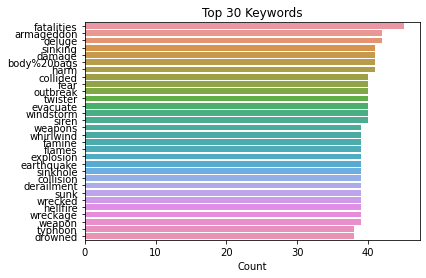

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [19]:
keywords_vc = pd.DataFrame({"Count": train["keyword"].value_counts()})
sns.barplot(y=keywords_vc[0:30].index, x=keywords_vc[0:30]["Count"], orient='h')
plt.title("Top 30 Keywords")
plt.show()
plt.figure(figsize=(20, 20))

In [20]:
# total unique keywords
len(train["keyword"].value_counts())

221

# Check diaster and non-diaster keywords


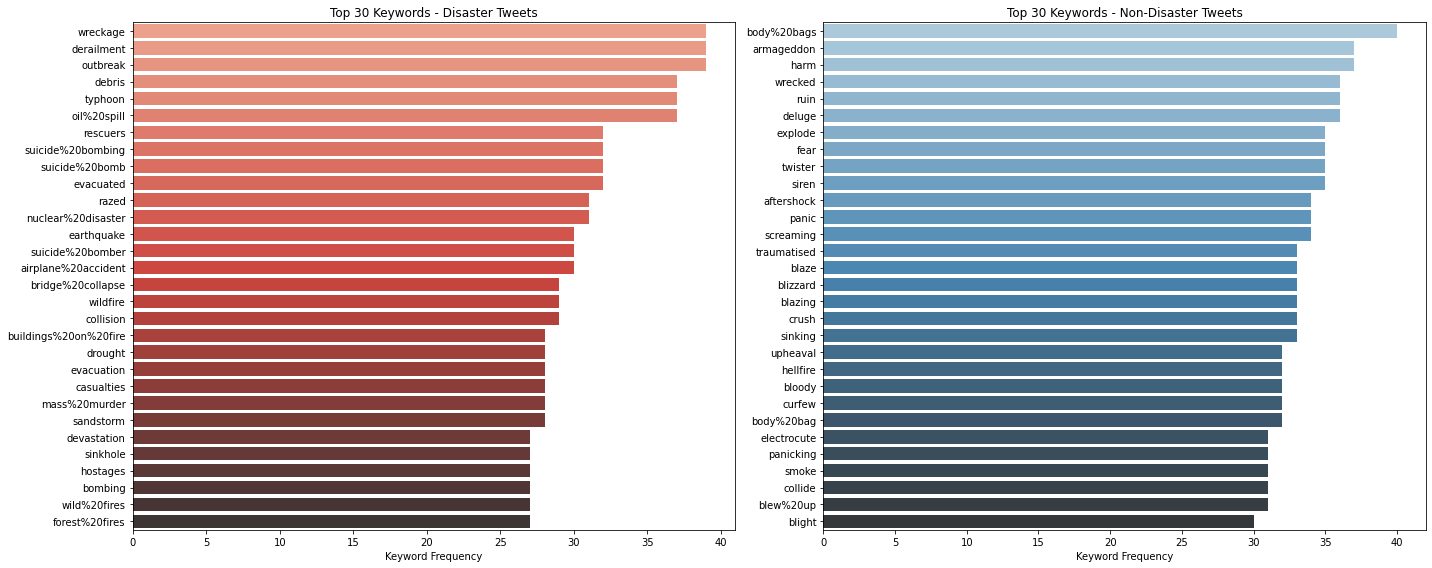

In [21]:
disaster_keywords = train.loc[train["target"] == 1]["keyword"].value_counts()
nondisaster_keywords = train.loc[train["target"] == 0]["keyword"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=disaster_keywords[0:30].index, x=disaster_keywords[0:30], orient='h', ax=ax[0], palette="Reds_d")
sns.barplot(y=nondisaster_keywords[0:30].index, x=nondisaster_keywords[0:30], orient='h', ax=ax[1], palette="Blues_d")
ax[0].set_title("Top 30 Keywords - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")
ax[1].set_title("Top 30 Keywords - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")
plt.tight_layout()
plt.show()

# Checking the tweets from 2nd most common keyword
checking tweets which are not a diaster

In [22]:
mask = (train["keyword"].fillna("").str.contains("armageddon")) & (train["target"] == 0)
armageddon_tweets = train[mask]
print("An example tweet from 10th row:\n", armageddon_tweets.iloc[10, 3])
armageddon_tweets.head()

An example tweet from 10th row:
 @ENews Ben Affleck......I know there's a wife/kids and other girls but I can't help it. I've loved him since Armageddon #eonlinechat


,id,keyword,location,text,target
304,446,armageddon,"California, United States",#PBBan (Temporary:300) avYsss @'aRmageddon | D...,0
305,447,armageddon,"California, United States",#PBBan (Temporary:300) Russaky89 @'aRmageddon ...,0
306,448,armageddon,#FLIGHTCITY UK,((OFFICIAL VID)) #DoubleCups &gt;&gt; https://...,0
307,450,armageddon,NaN,ouvindo Peace Love &amp; Armageddon,0
308,451,armageddon,NaN,Best movie you've ever seen? - Armageddon htt...,0


Given a keyword, lets check for disaster probability


In [23]:
def keyword_disaster_probabilities(x):
    tweets_w_keyword = np.sum(train["keyword"].fillna("").str.contains(x))
    tweets_w_keyword_disaster = np.sum(train["keyword"].fillna("").str.contains(x) & train["target"] == 1)
    return tweets_w_keyword_disaster / tweets_w_keyword

keywords_vc["Disaster_Probability"] = keywords_vc.index.map(keyword_disaster_probabilities)
keywords_vc.head()

,Count,Disaster_Probability
fatalities,45,0.577778
armageddon,42,0.119048
deluge,42,0.188406
sinking,41,0.195122
damage,41,0.463415


In [24]:
# sorting the diaster probabilty
k_vc = keywords_vc.sort_values(by="Disaster_Probability", ascending=False)
k_vc.head(10)

,Count,Disaster_Probability
derailment,39,1.000000
wreckage,39,1.000000
debris,37,1.000000
outbreak,40,0.975000
oil%20spill,38,0.973684
typhoon,38,0.973684
suicide%20bombing,33,0.969697
suicide%20bomber,31,0.967742
bombing,29,0.951613
suicide%20bomb,35,0.949495


In [25]:
k_vc.tail(20)

,Count,Disaster_Probability
blood,35,0.114286
blizzard,37,0.108108
mayhem,30,0.100000
harm,41,0.097561
stretcher,33,0.090909
smoke,34,0.088235
bloody,35,0.085714
epicentre,12,0.083333
wrecked,39,0.076923
panic,37,0.071429


# Let's explore location column

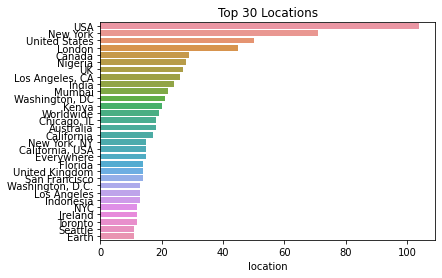

In [26]:
locations_vc = train["location"].value_counts()
sns.barplot(y=locations_vc[0:30].index, x=locations_vc[0:30], orient='h')
plt.title("Top 30 Locations")
plt.show()

In [27]:
len(train["location"].value_counts())

3341

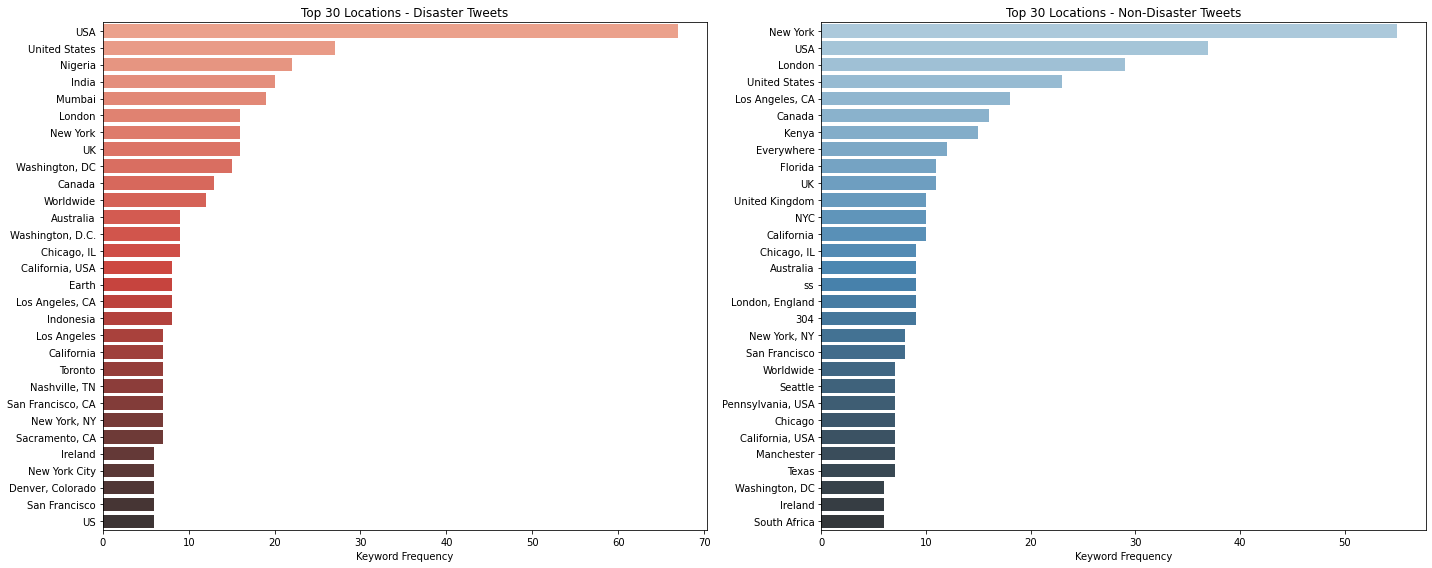

In [28]:
disaster_locations = train.loc[train["target"] == 1]["location"].value_counts()
nondisaster_locations = train.loc[train["target"] == 0]["location"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=disaster_locations[0:30].index, x=disaster_locations[0:30], orient='h', ax=ax[0], palette="Reds_d")
sns.barplot(y=nondisaster_locations[0:30].index, x=nondisaster_locations[0:30], orient='h', ax=ax[1], palette="Blues_d")
ax[0].set_title("Top 30 Locations - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")
ax[1].set_title("Top 30 Locations - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")
plt.tight_layout()
plt.show()

# Let's explore tweet content AKA text in our data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


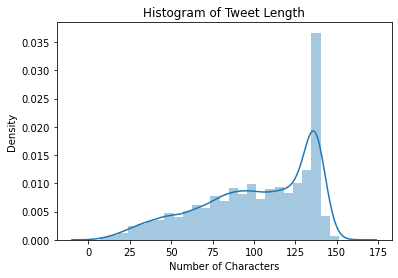

In [29]:
train["tweet_length"] = train["text"].apply(len)
sns.distplot(train["tweet_length"])
plt.title("Histogram of Tweet Length")
plt.xlabel("Number of Characters")
plt.ylabel("Density")
plt.show()

In [30]:
# min and max tweet length
min(train["tweet_length"]), max(train["tweet_length"])

(7, 157)

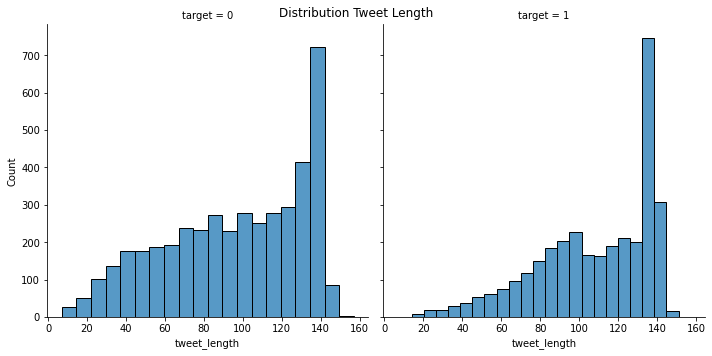

In [31]:
# histogram for each category of tweet
g = sns.FacetGrid(train, col="target", height=5)
g = g.map(sns.histplot, "tweet_length")
plt.suptitle("Distribution Tweet Length")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


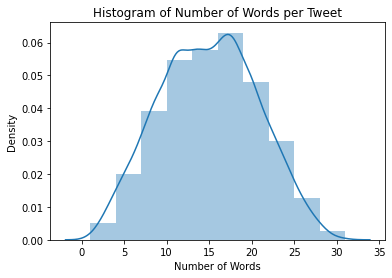

In [32]:
def count_words(x):
    return len(x.split())

train["num_words"] = train["text"].apply(count_words)
sns.distplot(train["num_words"], bins=10)
plt.title("Histogram of Number of Words per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


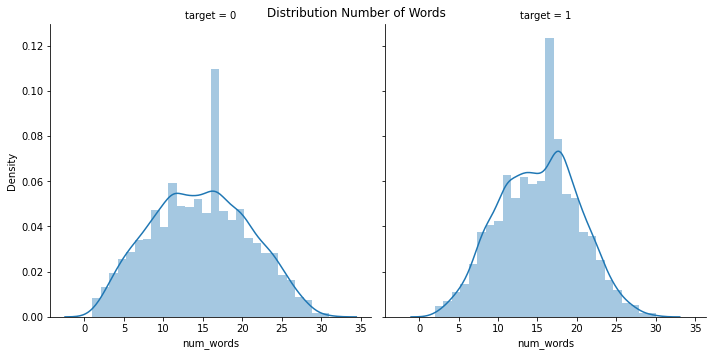

In [33]:
g = sns.FacetGrid(train, col="target", height=5)
g = g.map(sns.distplot, "num_words")
plt.suptitle("Distribution Number of Words")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


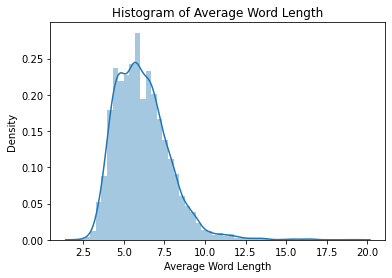

In [34]:
def avg_word_length(x):
    return np.sum([len(w) for w in x.split()]) / len(x.split())

train["avg_word_length"] = train["text"].apply(avg_word_length)
sns.distplot(train["avg_word_length"])
plt.title("Histogram of Average Word Length")
plt.xlabel("Average Word Length")
plt.ylabel("Density")
plt.show()

In [35]:
train

,id,keyword,location,text,target,tweet_length,num_words,avg_word_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.125000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.500000
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11,6.636364
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20,5.300000
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8,7.250000
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19,6.263158


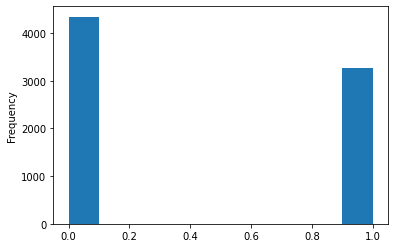

In [36]:
# our data is imbalanced and we will assume that in the real world/test data, 
# this will continued to be the case 
train["target"].plot(kind="hist")

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [37]:
# later you can use the whole data for traiing and test
train_df, valid_df = train_test_split(train, 
                                       random_state=42, 
                                      #  train_size=0.9, 
                                       test_size=.3,
                                       stratify=train["target"].values)

# use the below structure for testing if the data is huge
# train_df, remaining = train_test_split(train, 
#                                        random_state=42, 
#                                        train_size=0.0095, 
#                                        stratify=train["target"].values)

# valid_df, _ = train_test_split(remaining, 
#                               random_state=42, 
#                               train_size=0.0095, 
#                               stratify=remaining["target"].values)
len(train_df), len(valid_df)

(5329, 2284)

In [38]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df["text"].values,
                                                   train_df["target"].values))
  
  test_data = tf.data.Dataset.from_tensor_slices((valid_df["text"].values,
                                                   valid_df["target"].values))
train_data, test_data  

(<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>,
 <TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.int64)>)

In [39]:
for text, label in train_data.take(1):
  print(text)
  print(label)

tf.Tensor(b'Las Vegas in top 5 cities for red-light running fatalities http://t.co/kC8O81BcHG', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [40]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

# Label categories, right now our data has these categories
label_list = [0, 1]

# maximum length of (token) input sequences, or the words in a question
# to save speed we should reset this
max_seq_length = 64

train_batch_size = 32



In [41]:
# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
MODEL_URL = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
# MODEL_URL = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2"
bert_layer = hub.KerasLayer(MODEL_URL, trainable=True)


vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [42]:
# This provides a function to convert row to input features and label
from bs4 import BeautifulSoup
import re
import string

abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}
# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

# Factorize elongated words, add ELONG
def remove_elongated_words(text):
    rep = re.compile(r'\b(\S*?)([a-z])\2{2,}\b')
    return rep.sub(r'\1\2 ELONG', text)

# Factorize repeated punctuation, add REPEAT
def remove_repeat_punct(text):
    rep = re.compile(r'([!?.]){2,}')
    return rep.sub(r'\1 REPEAT', text)


# Remove all punctuations
def remove_all_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

# Remove punctuations
def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" 
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    if '...' not in text:
        text = text.replace('..', ' ... ')   
    return text

# Remove all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords)])
    return text

def get_clean_text(text_str):
  text_str = BeautifulSoup(text_str, "lxml").get_text()
  text_str = re.sub(r"@[A-Za-z0-9]+", " ", text_str)

  # replacing URLs with just 'URL' text
  text_str = re.sub(r"https?://[[A-Za-z0-9./]+", "URL", text_str)
  
  # remove html beacons
  text_str = re.sub(r"<.*?>", " ", text_str)

  # replacing @someuser to 'USER' text
  text_str = re.sub(r"@\S+", "USER", text_str)

  # replacing numbers to 'NUMBER' text
  text_str = re.sub(r"[-+]?[.\d]*[\d]+[:,.\d]*", "NUMBER", text_str)

  # correcting the abbreviated words to real meaning
  text_str = replace_abbrev(text_str)

  # Remove emojis / smileys
  text_str = remove_emoji(text_str)
  text_str = transcription_sad(text_str)
  text_str = transcription_smile(text_str)
  text_str = transcription_heart(text_str)
  
  # # Remove repeated puntuations / words
  text_str = remove_elongated_words(text_str)
  text_str = remove_repeat_punct(text_str)

  # text_str = remove_all_punct(text_str)
  # text_str = remove_punct(text_str)
  # text_str = remove_stopwords(text_str)


  text_str = re.sub(r"[^a-zA-Z.!?']", " ", text_str)
  text_str = re.sub(r" +", " ", text_str)
  
  


  return text_str

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  # guid is unique id for each example, we dont need textb as per our usecase
  clean_text = get_clean_text(text.numpy())
  # clean_text = text.numpy()

  example = classifier_data_lib.InputExample(guid=None, text_a=clean_text, label=label.numpy())

  feature = classifier_data_lib.convert_single_example(0, 
                                                       example, 
                                                       label_list, 
                                                       max_seq_length, 
                                                       tokenizer)
  
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)
  

In [43]:
# testing the feature function
# ct= get_clean_text("@ENews Ben Affleck......I know there's a wife/kids and other girls but I can't help it. I've loved him since Armageddon #eonlinechat")
# ct = tf.constant(ct)
# to_feature(ct, tf.constant(0))

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [44]:
def to_feature_map(text, label):
  out = tf.py_function(to_feature, inp=[text, label], 
                       Tout=[tf.int32, tf.int32, tf.int32, tf.int32,])
  iids, imask, segids, label = out[0], out[1], out[2], out[3]

  iids.set_shape([max_seq_length])
  imask.set_shape([max_seq_length])
  segids.set_shape([max_seq_length])
  label.set_shape([])

  x = {
        "input_word_ids": iids,
        "input_mask": imask,
        "input_type_ids": segids
  }
  return (x, label)



## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [45]:
s = train_data.take(1)
for t, l in s:
  # print(t)
  inps = to_feature_map(t, l)[0]  
  print(inps)

{'input_word_ids': <tf.Tensor: shape=(64,), dtype=int32, numpy=
array([  101,  5869,  7136,  1999,  2327,  2193,  3655,  2005,  2417,
        2422,  2770, 20871, 24471,  2140,   102,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)>, 'input_mask': <tf.Tensor: shape=(64,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)>, 'input_type_ids': <tf.Tensor: shape=(64,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:315: FutureWarning: Possible nested set at position 10


In [46]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data
                .map(to_feature_map, num_parallel_calls=tf.data.AUTOTUNE)
                .shuffle(1000)
                .batch(train_batch_size, drop_remainder=True)
                .prefetch(tf.data.AUTOTUNE))

  # valid
  
  test_data = (test_data
                .map(to_feature_map, num_parallel_calls=tf.data.AUTOTUNE)
                # .shuffle(1000) we dont need to shuffle the test data, just need them for predictions
                .batch(train_batch_size, drop_remainder=True)
                .prefetch(tf.data.AUTOTUNE))

  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [47]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 64), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 64), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 64), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [48]:
# valid data spec


## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [49]:
from tensorflow.keras import layers
# Train model
from datetime import datetime
from tensorflow.keras import callbacks

In [50]:
# Building the model
def create_model(drop_rate=0.4, m_name="model"):
  input_word_ids = layers.Input(shape=(max_seq_length, ),
                             dtype=tf.int32,
                             name="input_word_ids")
  input_mask = layers.Input(shape=(max_seq_length, ),
                             dtype=tf.int32,
                             name="input_mask")
  input_type_ids = layers.Input(shape=(max_seq_length, ),
                             dtype=tf.int32,
                             name="input_type_ids")
  # pooled output is vector representation of the whole sentence
  # sequesnced output is vector representation of each word
  inp_as_dict = {
      "input_word_ids": input_word_ids,
      "input_mask": input_mask,
      "input_type_ids": input_type_ids
  }
  inp_as_lst = [input_word_ids, input_mask, input_type_ids]

  bert_outputs = bert_layer(inp_as_dict)
  pooled_output = bert_outputs["pooled_output"]      # [batch_size, 768].
  sequence_output = bert_outputs["sequence_output"]  # [batch_size, seq_length, 768].


  # x = layers.Dense(512, activation = 'relu')(pooled_out)
  # x = layers.Dropout(0.3)(x)
  # x = layers.Dense(256, activation = 'relu')(x)
  # x = layers.Dropout(0.2)(x)
  x = layers.Dense(64, activation = 'relu')(pooled_output)
  x = layers.Dropout(drop_rate)(x)
  outputs = layers.Dense(1, activation="sigmoid", name="outputs")(x)

  model = tf.keras.Model(
      #mapping the input dict values here
      inputs = {
            'input_word_ids': input_word_ids,
            'input_mask': input_mask,
            'input_type_ids': input_type_ids,
      }, 
      outputs=outputs, name=m_name)
  
  return model


In [51]:
def compile_model(model, lr=2e-5):
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

  model_fig = tf.keras.utils.plot_model(model, show_shapes=True, dpi=72)
  return model, model_fig

In [52]:
model = create_model(m_name="model0")
model.summary()

Model: "model0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_mask (InputLayer)         [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_word_ids (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'pooled_output': (N 109482241   input_mask[0][0]                 
                                                                 input_type_ids[0][0]        

In [53]:
model, _ = compile_model(model, 3e-5)

In [ ]:
now = datetime.now()
curr_time = now.strftime("%Y%m%d_%H%M%S")
filepath = "/content/drive/MyDrive/AI_ML_DL/Kaggle/01. Disaster tweet/dense" + curr_time  
chk_pt = callbacks.ModelCheckpoint(filepath=filepath,
                                    save_weights_only=True,
                                    verbose=0)

EPOCHS = 3
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=EPOCHS,
                    callbacks=[chk_pt])

Epoch 1/3
 36/166 [=====>........................] - ETA: 1:42 - loss: 0.5714 - accuracy: 0.7240

## Task 10: Fine-Tune BERT for Text Classification

## Task 11: Evaluate the BERT Text Classification Model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [ ]:
plot_graphs(history, "accuracy")
y_pred = model.predict(test_data)
calculate_results(valid_df["target"], y_pred)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:

TEST_URL = "https://raw.githubusercontent.com/gkv856/KaggleData/main/test.csv"
df_test = pd.read_csv(TEST_URL)
df_test.head()

In [ ]:
# num = 5
# test_sample = df_test["text"].head(num)
# ids = df_test['id'].head(num)
# test_sample

num = 5
test_sample = df_test["text"]#.head(num)
ids = df_test['id']#.head(num)
test_sample

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

In [ ]:
real_test_data = tf.data.Dataset.from_tensor_slices((test_sample, [0]*len(test_sample)))
real_test_data = (real_test_data.map(to_feature_map).batch(train_batch_size)
                  .prefetch(tf.data.AUTOTUNE))

y_preds = model.predict(real_test_data) 
y_preds = tf.round(y_preds)
y_preds = tf.cast(y_preds, dtype=tf.int32)

res = tf.squeeze(y_preds).numpy()
my_sub = pd.DataFrame({'id': ids,'target':res})

my_sub.head(20)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [ ]:
my_sub.to_csv("sub.csv", index=False)

In [ ]:
model3 = create_model(m_name="model3")

In [ ]:
model3, _ = compile_model(model3, lr=0.1)
model3.load_weights(filepath)